# Exploratory Data Analysis and Feature Engineering using Zomato Bangalore Restaurants Dataset from Kaggle
## Context:
The data is from an Indian resturant search and discovery company, Zomato. And focuses on the Indian city of Bengalore. This is a dataset that I dived into without any idea of what I was looking for. I systematically attacked each variable and tried to glean as much information as I could from it. While doing so, I went online and found GeoPy, in the weeks to come I intend to use this same dataset for a Geographical Clustering Project. I do not see this project as anywhere near complete. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
zomato = pd.read_csv('zomato.csv')

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
zomato['menu_item'].nunique()

9098

In [8]:
#We dont need the URL or address for this analysis
zomato.drop(['url','address'],axis=1,inplace=True)

In [9]:
#Or phone number for that matter
zomato.drop(['phone'],axis=1,inplace=True)

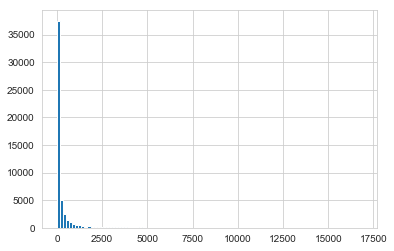

In [10]:
zomato['votes'].hist(bins=100)

In [11]:
zomato['logVotes'] = zomato['votes'].apply(lambda x: np.log(x))

In [12]:
zomato.drop('logVotes',axis=1,inplace=True)

In [13]:
zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

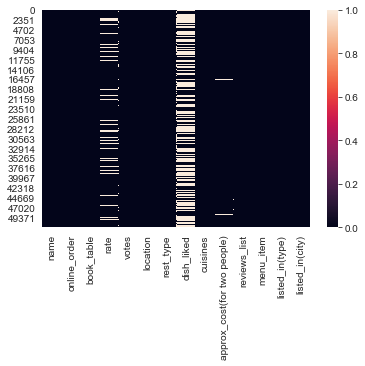

In [14]:
sns.heatmap(zomato.isna())

In [15]:
#I sense a lot of potential in this
zomato['rest_type'].value_counts()

Quick Bites                    19132
Casual Dining                  10330
Cafe                            3732
Delivery                        2604
Dessert Parlor                  2263
Takeaway, Delivery              2037
Casual Dining, Bar              1154
Bakery                          1141
Beverage Shop                    867
Bar                              697
Food Court                       624
Sweet Shop                       468
Bar, Casual Dining               425
Lounge                           396
Pub                              357
Fine Dining                      346
Casual Dining, Cafe              319
Beverage Shop, Quick Bites       298
Bakery, Quick Bites              289
Mess                             267
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     164
Cafe, Dessert Parlor             148
B

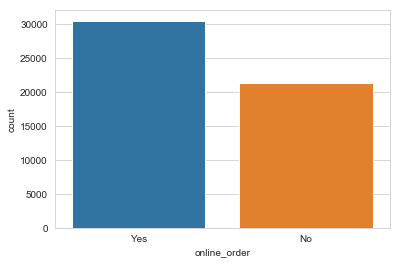

In [16]:
sns.countplot(zomato['online_order'])

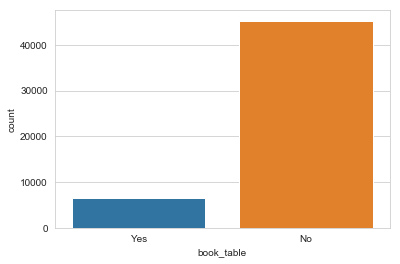

In [17]:
sns.countplot(zomato['book_table'])

In [18]:
#Could these locations be divided into high frequency
zomato['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
                         ... 
Hosur Road                102
Kaggadasapura             101
CV Raman N

In [19]:
zomato['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

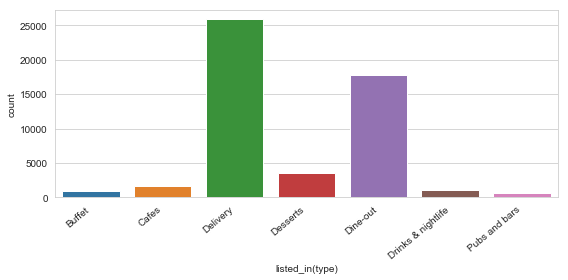

In [20]:
plt.figure(figsize=(8,4))
ax = sns.countplot(zomato['listed_in(type)'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [21]:
#Fizing the ratings column
float(zomato['rate'][0].split('/')[0])

4.1

In [22]:
#Some more possibilities through this
zomato['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1 /5    1474
4.1/5     1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
          ... 
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [23]:
zomato['new_rest'] = 0


In [24]:
def new_transformer(string):
    if string == 'NEW':
        return 1
    else:
        return 0

In [25]:
#Creating a dummy variable for new resturants
zomato['new_rest'] = zomato['rate'].apply(lambda x: new_transformer(x))

In [26]:
zomato['new_rest'].value_counts()

0    49509
1     2208
Name: new_rest, dtype: int64

In [27]:
zomato['rate'].isna().sum()

7775

In [28]:
zomato['rate'].fillna(value='0/5',inplace=True)


In [29]:
zomato['rate'].isna().sum()

0

In [30]:
zomato['rate'].replace(to_replace='NEW',value='0/5',inplace=True)

In [31]:
zomato['rate'].replace(to_replace='-',value='0/5',inplace=True)

In [32]:
float(zomato['rate'][0].split('/')[0])

4.1

In [33]:
zomato['rate'] = zomato['rate'].apply(lambda x: float(x.split('/')[0]))

In [34]:
zomato['rate'].describe()

count    51717.000000
mean         2.981209
std          1.516766
min          0.000000
25%          3.000000
50%          3.600000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

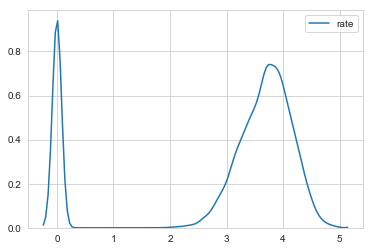

In [35]:
sns.kdeplot(zomato['rate'])

In [36]:
zomato['approx_cost(for two people)'].nunique()

70

In [37]:
zomato['approx_cost(for two people)'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
250      2959
800      2285
150      2066
700      1948
350      1763
1,000    1637
450      1417
100       993
1,200     993
1,500     971
650       776
550       761
750       758
900       700
1,300     516
1,100     512
1,400     473
2,000     363
1,600     266
1,700     247
1,800     203
850       166
3,000     162
2,500     146
2,200      78
         ... 
3,400      13
2,300      11
80         10
2,600      10
230        10
1,250       9
40          8
130         8
50          8
1,650       6
1,450       5
4,100       4
330         4
199         4
1,050       4
2,700       3
70          3
190         2
3,200       2
140         2
4,500       2
360         2
240         2
6,000       2
3,700       1
5,000       1
160         1
560         1
60          1
469         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [38]:
zomato.dropna(subset=['approx_cost(for two people)'],inplace=True)

In [39]:
type(zomato['approx_cost(for two people)'][0])

str

In [40]:
zomato['approx_cost(for two people)'][51687].replace(',','')


'1700'

In [41]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x : x.replace(',',''))


In [42]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x: float(x))

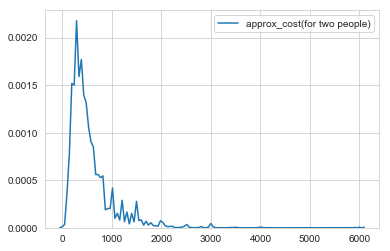

In [43]:
sns.kdeplot(zomato['approx_cost(for two people)'])

In [44]:
zomato['menu_item'][0]

'[]'

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='listed_in(city)', data=zomato)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
zomato['name'].value_counts()

In [ ]:
ratings = pd.DataFrame(zomato.groupby('name')['rate'].mean())


In [ ]:
ratings['num of ratings'] = pd.DataFrame(zomato.groupby('name')['rate'].count())
ratings.head()

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

In [ ]:
plt.figure(figsize=(10,4))
ratings['rate'].hist(bins=70)

In [ ]:
sns.heatmap(ratings[ratings['rate']>0])

In [ ]:
sns.jointplot(x='rate',y='num of ratings',data=ratings,alpha=0.5)

In [ ]:
zomato.drop('rest_type',axis=1,inplace=True)

In [ ]:
x =  zomato['cuisines'][0].split(',')[1]
x

In [ ]:
zomato.dropna(subset= ['cuisines'],inplace=True)

In [ ]:
zomato['cuisine_type1'] = zomato['cuisines'].apply(lambda x: x.split(',')[0])
zomato['cuisine_type1']

In [ ]:
zomato['cuisine_type1'].value_counts()

In [ ]:
zomato['cuisines'] =zomato['cuisines'].apply(lambda x: x.split(','))

In [ ]:
def cuisine_getter(x):
    if len(x) > 1:
        return x[1]
    else:
        return ''

In [ ]:
x = cuisine_getter(zomato['cuisines'][0])
x

In [ ]:
zomato['cuisine_type2'] = zomato['cuisines'].apply(lambda x: cuisine_getter(x))


In [ ]:
zomato['cuisine_type2'] 

In [ ]:
zomato['no_of_cuisines'] = zomato['cuisines'].apply(lambda x: len(x))

In [ ]:
zomato['no_of_cuisines'].describe()

In [ ]:
zomato['no_of_cuisines'].hist(bins=8)

In [ ]:
def cuisine_getter2(x):
    if len(x) > 2:
        return x[2]
    else:
        return ''

In [ ]:
zomato['cuisine_type3'] = zomato['cuisines'].apply(lambda x: cuisine_getter2(x))

In [ ]:
sns.clustermap(zomato.corr(),cmap='coolwarm')

In [ ]:
plt.figure(figsize=(10,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='viridis')
plt.title("Most famous restaurants")
plt.xlabel("Number of outlets")